# Dataset no. 1: Revision 

To start with the project I analysed the 3 datasets separately in order to reduce as much as I can the number of variables contained in each dataset. This is the analysis for dataset no. 1 which is Financial Performance.

Index:

<a class="anchor" id="index"></a>

1. [Importing the datasets - First check](#1)
2. [Missing values](#2)
3. [Feature selection using Random Forest](#3)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go

## 1. Importing the datasets - First check
<a class="anchor" id="1"></a>

[^Index](#index)

In [2]:
data = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/financial-performance-dataset-in-usd.csv')

In [3]:
data.head()

,MFI ID,MFI Name,Fiscal Year,Currency,Period Type,As of Date,Personnel,Personnel > Gender > Female,Personnel > Gender > Male,Number of staff employed for one year or more,...,"Percentage of total transactions at sub-branches, number","Percentage of total transactions at ADCs, number","Percentage of total transactions at agents, value","Percentage of total transactions at merchant POS, value","Percentage of total transactions by internet, value","Percentage of total transactions by mobile banking, value","Percentage of total transactions at roving staff, value","Percentage of total transactions at sub-branches, value","Percentage of total transactions at ATMs, value","Percentage of total transactions at ADCs, value"
0,100372,1st Valley Bank,2000,USD,ANN,12/31/2000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100372,1st Valley Bank,2001,USD,ANN,12/31/2001,81.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100372,1st Valley Bank,2002,USD,ANN,12/31/2002,91.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100372,1st Valley Bank,2003,USD,ANN,12/31/2003,114.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100372,1st Valley Bank,2004,USD,ANN,12/31/2004,142.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Columns: 276 entries, MFI ID to Percentage of total transactions at ADCs, value
dtypes: float64(268), int64(2), object(6)
memory usage: 86.9+ MB


In [5]:
data.head().T

,0,1,2,3,4
MFI ID,100372,100372,100372,100372,100372
MFI Name,1st Valley Bank,1st Valley Bank,1st Valley Bank,1st Valley Bank,1st Valley Bank
Fiscal Year,2000,2001,2002,2003,2004
Currency,USD,USD,USD,USD,USD
Period Type,ANN,ANN,ANN,ANN,ANN
...,...,...,...,...,...
"Percentage of total transactions by mobile banking, value",NaN,NaN,NaN,NaN,NaN
"Percentage of total transactions at roving staff, value",NaN,NaN,NaN,NaN,NaN
"Percentage of total transactions at sub-branches, value",NaN,NaN,NaN,NaN,NaN
"Percentage of total transactions at ATMs, value",NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MFI ID,41258.0,111079.510083,21140.315466,100000.0000,100486.00000,101437.00000,104341.000000,178532.0000
Fiscal Year,41258.0,2012.065830,4.488909,1999.0000,2009.00000,2013.00000,2016.000000,2020.0000
Personnel,34446.0,672.064855,3064.354560,0.0000,39.00000,142.00000,503.000000,263300.0000
Personnel > Gender > Female,7076.0,208.245902,575.502459,0.0000,14.00000,45.00000,153.000000,11914.0000
Personnel > Gender > Male,251.0,779.756972,2221.425166,1.0000,34.50000,157.00000,680.500000,18756.0000
...,...,...,...,...,...,...,...,...
"Percentage of total transactions by mobile banking, value",300.0,0.171087,0.325303,0.0000,0.00000,0.00030,0.123325,1.1212
"Percentage of total transactions at roving staff, value",265.0,0.103704,0.267144,0.0000,0.00000,0.00000,0.000000,1.1077
"Percentage of total transactions at sub-branches, value",284.0,0.198692,0.371607,0.0000,0.00000,0.00000,0.122300,1.1136
"Percentage of total transactions at ATMs, value",330.0,0.205507,0.337792,0.0000,0.00000,0.01555,0.275725,1.1484


In [7]:
#I have on the dataset 3166 different MFIs

data['MFI ID'].nunique()

3116

## 2. Missing values
<a class="anchor" id="2"></a>

[^Index](#index)

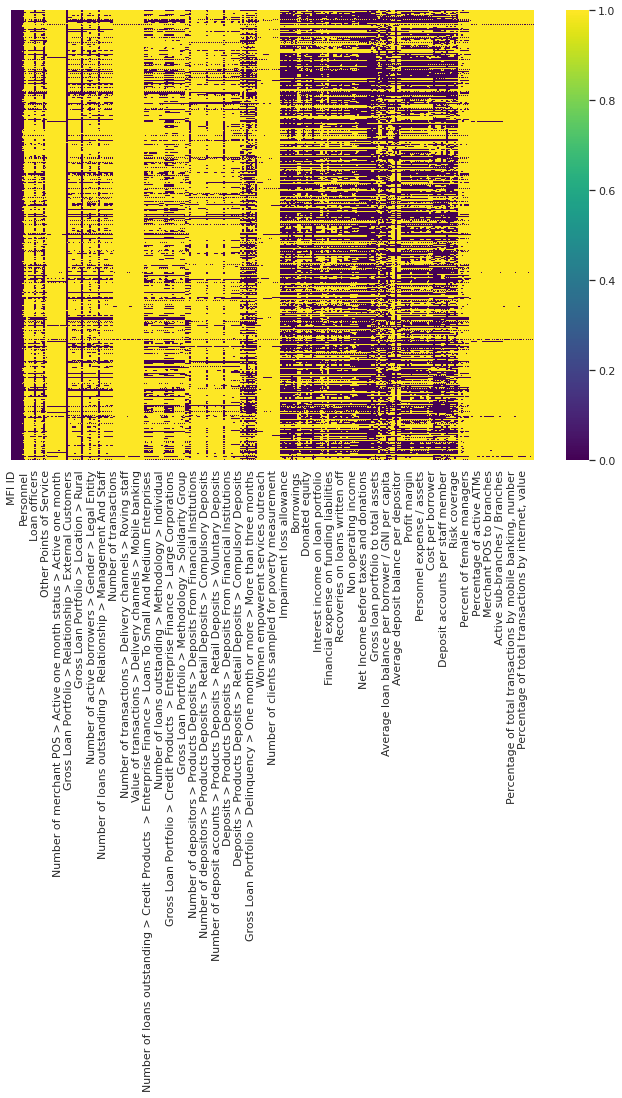

In [8]:
#A heatmap will give me a good idea of how many missing values I have

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [9]:
#I create a function in order to confirm the percentage of null values each variable has

def percentage_nullValues(data):
 
    null_perc = round(data.isnull().sum() / data.shape[0],3) * 100.00
    null_perc = pd.DataFrame(null_perc, columns=['Percentage_NaN'])
    null_perc= null_perc.sort_values(by = ['Percentage_NaN'], ascending = False)
    return null_perc

In [10]:
percentage_nullValues(data)

,Percentage_NaN
Percentage of active roving staff,99.7
Percentage of active merchant POS,99.6
"Percentage of total transactions at ADCs, value",99.5
Percentage of active sub-branches,99.5
"Percentage of total transactions at roving staff, value",99.4
...,...
As of Date,0.0
Period Type,0.0
Currency,0.0
Fiscal Year,0.0


In [11]:
#I want to select a threshold of 35% in order to reduce as much as I can 'nan' values

data_missing = percentage_nullValues(data)

In [12]:
def select_threshold(data, thr):
   
    null_perc = percentage_nullValues(data)
      
    col_keep = null_perc[null_perc['Percentage_NaN'] <thr]
    col_keep = list(col_keep.index)
    print('Columns to keep:',len(col_keep))
    print('Those columns have a percentage of NaN less than', str(thr), ':')
    print(col_keep)
    data_c= data[col_keep]
    
    return data_c

In [13]:
#These are the variables kept after the threshold

data_missing = select_threshold(data, 35)
data_missing

Columns to keep: 42
Those columns have a percentage of NaN less than 35 :
['Deposits to total assets', 'Average outstanding balance', 'Loan officers', 'Number of loans outstanding', 'Profit margin', 'Average equity', 'Operational self sufficiency', 'Average assets', 'Operating expense', 'Financial revenue', 'Borrowings', 'Average number of active borrowers', 'Deposits to loans', 'Profit (loss)', 'Net Income before taxes and donations', 'Net Income after taxes and before donations', 'Net operating income', 'Net loan portfolio', 'Offices', 'Gross Loan Portfolio > Delinquency > One month or more', 'Average loan balance per borrower / GNI per capita', 'Debt to equity ratio', 'Impairment loss allowance', 'Liabilities', 'Liabilities and equity', 'Average gross loan portfolio', 'Portfolio at risk > 30 days', 'Borrowers per staff member', 'Capital /asset ratio', 'Gross loan portfolio to total assets', 'Equity', 'Personnel', 'Assets', 'Average loan balance per borrower', 'Number of active borro

,Deposits to total assets,Average outstanding balance,Loan officers,Number of loans outstanding,Profit margin,Average equity,Operational self sufficiency,Average assets,Operating expense,Financial revenue,...,Assets,Average loan balance per borrower,Number of active borrowers,Gross Loan Portfolio,MFI Name,As of Date,Period Type,Currency,Fiscal Year,MFI ID
0,NaN,NaN,NaN,NaN,0.1497,NaN,1.1760,NaN,542516.0,1147444.0,...,5592112.0,502.0,9665.0,4850280.0,1st Valley Bank,12/31/2000,ANN,USD,2000,100372
1,NaN,NaN,NaN,NaN,0.1507,1087748.0,1.1775,5811562.0,578630.0,1220164.0,...,6031012.0,481.0,10121.0,4872278.0,1st Valley Bank,12/31/2001,ANN,USD,2001,100372
2,NaN,NaN,NaN,NaN,0.1671,1210628.0,1.2006,6424207.0,748192.0,1303635.0,...,6817401.0,309.0,17138.0,5299626.0,1st Valley Bank,12/31/2002,ANN,USD,2002,100372
3,0.5222,392.0,92.0,18340.0,0.1607,1363912.0,1.1915,7894311.0,931824.0,1726500.0,...,8971220.0,400.0,17973.0,7188694.0,1st Valley Bank,12/31/2003,ANN,USD,2003,100372
4,0.5410,483.0,102.0,22595.0,0.2040,1626017.0,1.2563,11024507.0,1219840.0,2342485.0,...,13077794.0,511.0,21350.0,10906346.0,1st Valley Bank,12/31/2004,ANN,USD,2004,100372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,0.4559,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,414601.0,197.0,535.0,105178.0,Zion MFB,12/31/2008,ANN,USD,2008,134212
41254,0.4519,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,502341.0,198.0,676.0,133779.0,Zion MFB,12/31/2009,ANN,USD,2009,134212
41255,0.6511,233.0,5.0,866.0,NaN,NaN,NaN,NaN,NaN,NaN,...,571349.0,233.0,866.0,201789.0,Zion MFB,12/31/2010,ANN,USD,2010,134212
41256,0.0000,NaN,NaN,NaN,0.3341,NaN,1.5017,NaN,210178.0,321904.0,...,3866426.0,NaN,NaN,2721890.0,Аltayskiy Fond Mikrozaymov,12/31/2010,ANN,USD,2010,149250


In [14]:
#This is how my dataset looks now...

data_missing.shape

(41258, 42)

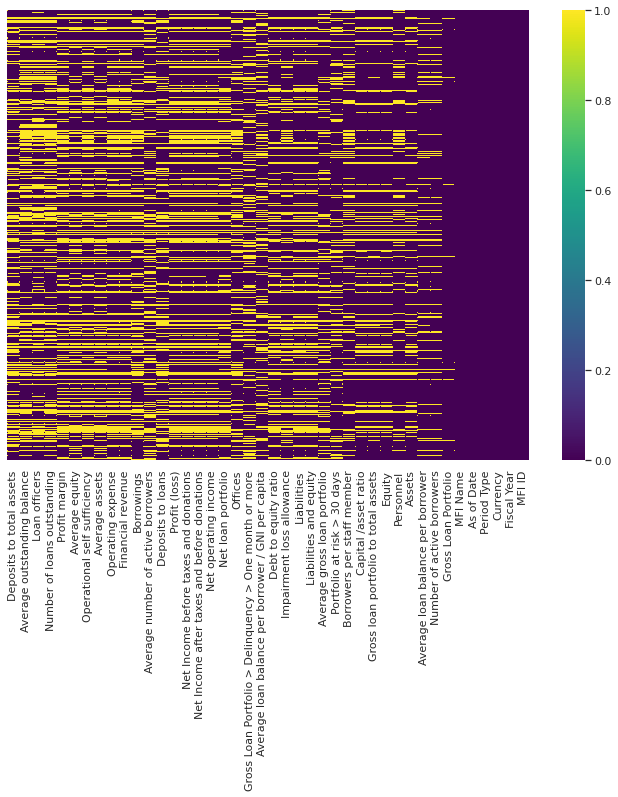

In [15]:
#...and how my missing values look!

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data_missing.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [16]:
# I removed columns like 'MFI ID' and 'Currency' which are not adding any value

data_missing.drop(columns=['MFI ID', 'Currency'],axis=1,inplace=True)

/home/user/my-project-env/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
data_missing.shape

(41258, 40)

In [18]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Deposits to total assets                                26859 non-null  float64
 1   Average outstanding balance                             26906 non-null  float64
 2   Loan officers                                           26988 non-null  float64
 3   Number of loans outstanding                             27118 non-null  float64
 4   Profit margin                                           27500 non-null  float64
 5   Average equity                                          27764 non-null  float64
 6   Operational self sufficiency                            27778 non-null  float64
 7   Average assets                                          27853 non-null  float64
 8   Operating expense                   

### 3. Feature selection using Random Forest
<a class="anchor" id="3"></a>

[^Index](#index)

In [19]:
data2 = data_missing.copy()

In [20]:
#I am removing this columns as will not affect my selection

remove = ['MFI Name', 'As of Date', 'Period Type']
data2 = data2[data2.columns.difference(remove)]

In [21]:
data2.shape

(41258, 37)

In [22]:
#I will replace the 'nan values' with the mean (for numerical values) and the mode (for categorical) as
#I need them for my project

for column in data2: 
    if data2[column].dtype != 'object':
        data2[column] = data2[column].fillna(data2[column].mean())
    else:
        data2[column] = data2[column].fillna(data2[column].mode()[0])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [24]:
X =  data2.drop('Fiscal Year', axis=1)
y = data2['Fiscal Year']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [27]:
sel.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False,  True, False, False,  True,  True, False, False])

In [28]:
#Random Forest method confirms 15 variables will be useful to study

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

15

In [29]:
print(selected_feat)

Index(['Average gross loan portfolio', 'Average loan balance per borrower',
       'Average loan balance per borrower / GNI per capita',
       'Average number of active borrowers', 'Average outstanding balance',
       'Borrowers per staff member', 'Gross Loan Portfolio',
       'Gross Loan Portfolio > Delinquency > One month or more',
       'Gross loan portfolio to total assets', 'Impairment loss allowance',
       'Loan officers', 'Number of active borrowers', 'Offices', 'Personnel',
       'Portfolio at risk > 30 days'],
      dtype='object')


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Columns: 276 entries, MFI ID to Percentage of total transactions at ADCs, value
dtypes: float64(268), int64(2), object(6)
memory usage: 86.9+ MB


In [31]:
data['Fiscal Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1999, 2020])

In [32]:
#I keep the variables confirmed by Random Forest only

data = data[['MFI Name', 'As of Date', 'Period Type', 'Fiscal Year', 'Average gross loan portfolio', 'Average loan balance per borrower',
       'Average loan balance per borrower / GNI per capita',
       'Average outstanding balance', 'Borrowers per staff member',
       'Gross Loan Portfolio',
       'Gross Loan Portfolio > Delinquency > One month or more',
       'Gross loan portfolio to total assets', 'Impairment loss allowance',
       'Loan officers', 'Number of active borrowers', 'Offices', 'Personnel',
       'Portfolio at risk > 30 days', 'Average number of active borrowers']]

In [33]:
#I try to check how the dataset looks like after all...

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                41258 non-null  object 
 1   As of Date                                              41258 non-null  object 
 2   Period Type                                             41258 non-null  object 
 3   Fiscal Year                                             41258 non-null  int64  
 4   Average gross loan portfolio                            31321 non-null  float64
 5   Average loan balance per borrower                       36722 non-null  float64
 6   Average loan balance per borrower / GNI per capita      30732 non-null  float64
 7   Average outstanding balance                             26906 non-null  float64
 8   Borrowers per staff member          

In [34]:
df = data.copy()

In [35]:
percentage_nullValues(df)

,Percentage_NaN
Average outstanding balance,34.8
Loan officers,34.6
Average number of active borrowers,30.9
Offices,27.9
Gross Loan Portfolio > Delinquency > One month or more,26.8
Average loan balance per borrower / GNI per capita,25.5
Impairment loss allowance,24.7
Average gross loan portfolio,24.1
Portfolio at risk > 30 days,21.1
Borrowers per staff member,20.7


In [36]:
#...and replace by the mean all numerical values missing

for column in df: 
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].mean())

In [37]:
df.shape

(41258, 19)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                41258 non-null  object 
 1   As of Date                                              41258 non-null  object 
 2   Period Type                                             41258 non-null  object 
 3   Fiscal Year                                             41258 non-null  int64  
 4   Average gross loan portfolio                            41258 non-null  float64
 5   Average loan balance per borrower                       41258 non-null  float64
 6   Average loan balance per borrower / GNI per capita      41258 non-null  float64
 7   Average outstanding balance                             41258 non-null  float64
 8   Borrowers per staff member          

In [39]:
#Save the dataset I will be working with from now on

df.to_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/finace_dataset_selectedf.csv')